In [94]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [96]:
df.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [97]:
dff = df.copy()

# Basic EDA on the data

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df[['Unit price','Quantity','Tax 5%','Total','cogs','gross income','Rating']].corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price      1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity        0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%          0.633962  0.705510  1.000000  1.000000  1.000000   
Total           0.633962  0.705510  1.000000  1.000000  1.000000   
cogs            0.633962  0.705510  1.000000  1.000000  1.000000   
gross income    0.633962  0.705510  1.000000  1.000000  1.000000   
Rating         -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

              gross income    Rating  
Unit price        0.633962 -0.008778  
Quantity          0.705510 -0.015815  
Tax 5%            1.000000 -0.036442  
Total             1.000000 -0.036442  
cogs              1.000000 -0.036442  
gross income      1.000000 -0.036442  
Rating           -0.036442  1.000000

In [100]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

In [101]:
df.describe(include='O')

Invoice ID Branch    City Customer type  Gender         Product line  \
count          1000   1000    1000          1000    1000                 1000   
unique         1000      3       3             2       2                    6   
top     750-67-8428      A  Yangon        Member  Female  Fashion accessories   
freq              1    340     340           501     501                  178   

            Date   Time  Payment  
count       1000   1000     1000  
unique        89    506        3  
top     2/7/2019  19:48  Ewallet  
freq          20      7      345

In [102]:
df[['Product line','Quantity']].groupby(by = ['Product line']).mean().sort_values(by = 'Quantity', ascending=False)

Quantity
Product line                    
Electronic accessories  5.711765
Home and lifestyle      5.693750
Health and beauty       5.618421
Sports and travel       5.542169
Food and beverages      5.471264
Fashion accessories     5.067416

In [103]:
df[['Product line','cogs']].groupby(by = ['Product line']).mean().sort_values(by = 'cogs', ascending=False)

cogs
Product line                      
Home and lifestyle      320.606625
Sports and travel       316.252590
Health and beauty       308.231447
Food and beverages      307.306207
Electronic accessories  304.411941
Fashion accessories     290.561236

In [104]:
d1 = df[['Product line','Quantity']].groupby(by = ['Product line']).sum(). \
sort_values(by = 'Quantity', ascending=False)

[Text(0, 0, '971'),
 Text(0, 0, '952'),
 Text(0, 0, '920'),
 Text(0, 0, '911'),
 Text(0, 0, '902'),
 Text(0, 0, '854')]

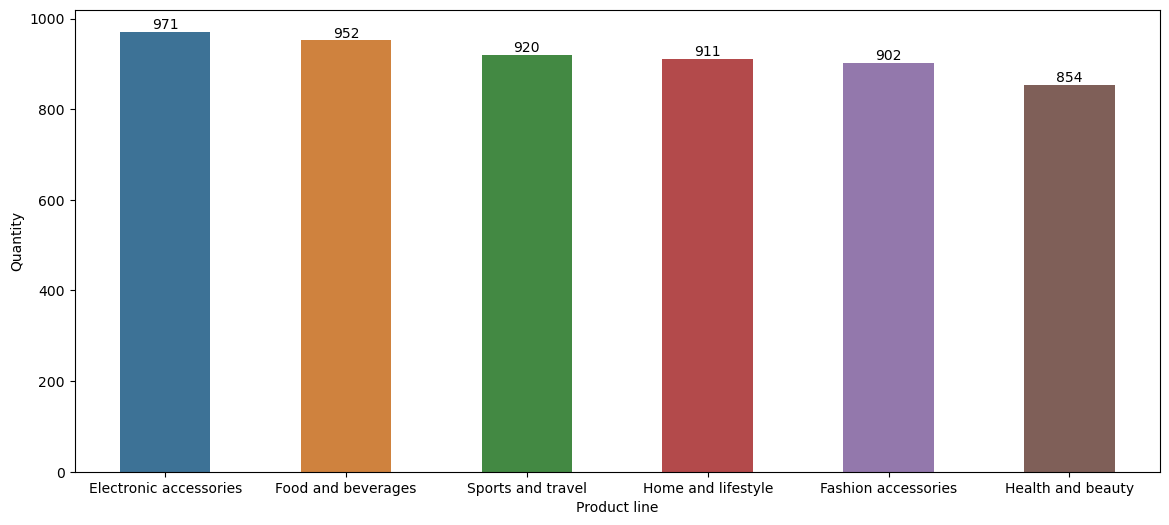

In [105]:
plt.figure(figsize=(14,6))
ax=sns.barplot(data =d1, x=d1.index, y='Quantity', width=0.5, saturation=0.6)
ax.bar_label(ax.containers[0])

In [106]:
d2 = df[['Product line','cogs','Gender']].groupby(by = ['Product line','Gender']).sum()

In [107]:
d2.reset_index(inplace=True)

In [108]:
d2

Product line  Gender      cogs
0   Electronic accessories  Female  25811.45
1   Electronic accessories    Male  25938.58
2      Fashion accessories  Female  28988.00
3      Fashion accessories    Male  22731.90
4       Food and beverages  Female  31591.35
5       Food and beverages    Male  21879.93
6        Health and beauty  Female  17677.13
7        Health and beauty    Male  29174.05
8       Home and lifestyle  Female  28606.55
9       Home and lifestyle    Male  22690.51
10       Sports and travel  Female  27214.02
11       Sports and travel    Male  25283.91

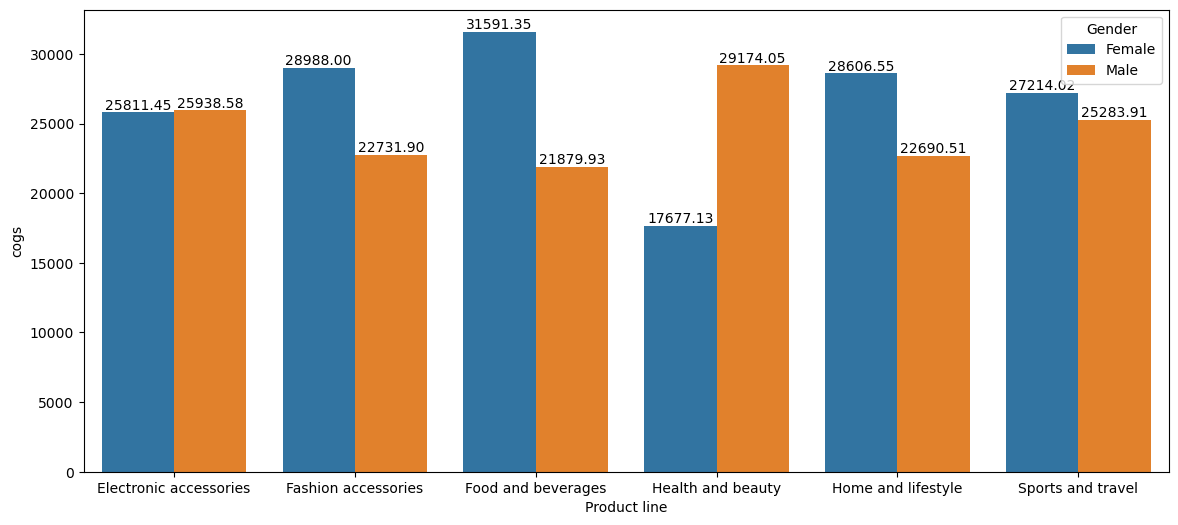

In [109]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=d2, x='Product line', y='cogs', hue='Gender')

for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', fmt='%.2f', fontsize=10)

In [110]:
ay = df[['cogs', 'Gender']].groupby(by=['Gender']).sum()

In [111]:
import plotly.express as px

([<matplotlib.patches.Wedge at 0x16af17990>,
 [Text(-0.06967539520045724, 1.1178306398125166, 'Female'),
  Text(0.06843119171473416, -1.0978693783872933, 'Male')],
 [Text(-0.03857030805739596, 0.6187991041819287, '51.98'),
  Text(0.03732610457167318, -0.5988378427567053, '48.02')])

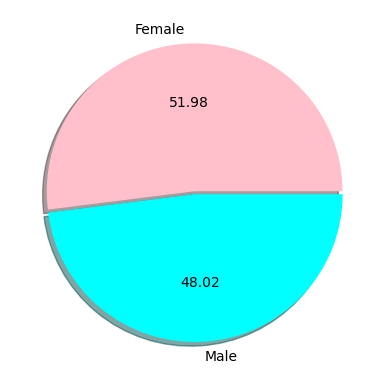

In [112]:
plt.pie(data=ay, x='cogs', autopct='%.2f', labels=ay.index, explode=[0.02,0], colors=['pink','cyan'],shadow=True )

In [113]:
px.strip(data_frame = df, x='Branch', y='gross income', color='Branch')

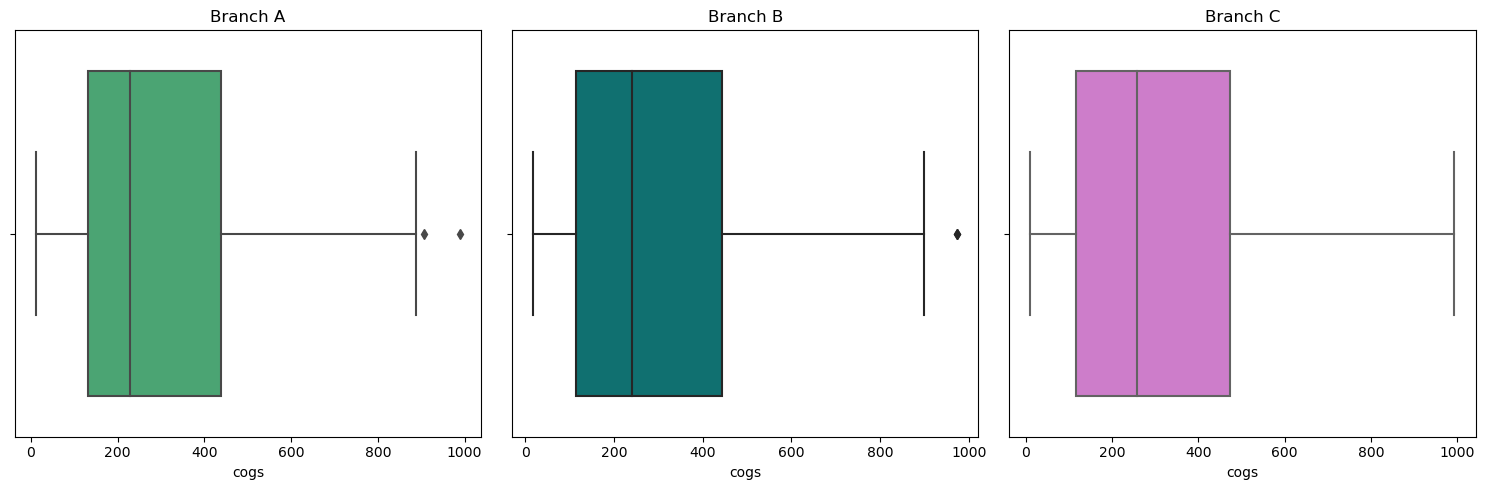

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

branches = ['A', 'B', 'C']
colors = ['mediumseagreen', 'teal', 'orchid']

for branch, ax, color in zip(branches, axes, colors):
    sns.boxplot(data=dff[dff['Branch'] == branch], x='cogs', ax=ax, color=color)
    ax.set_title(f'Branch {branch}')
    

plt.tight_layout()
plt.show()


In [115]:
dff[dff['Branch']=='A']['cogs']

0      522.83
2      324.31
3      465.76
4      604.17
6      413.04
        ...  
990    282.80
992    116.06
997     31.84
998     65.82
999    618.38
Name: cogs, Length: 340, dtype: float64

Text(0.5, 1.0, 'Ratings v/s Branch')

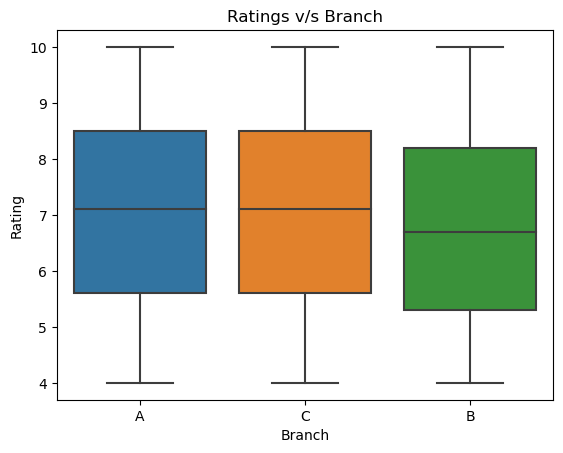

In [116]:
sns.boxplot(x="Branch", y = "Rating" ,data =df).set_title("Ratings v/s Branch") 

In [117]:
df['Time'] = pd.to_datetime(df['Time'])

In [118]:
df['Hour'] = df['Time'].dt.hour 
sorted(df['Hour'].unique())

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Text(0.5, 1.0, 'Product Sales per Hour')

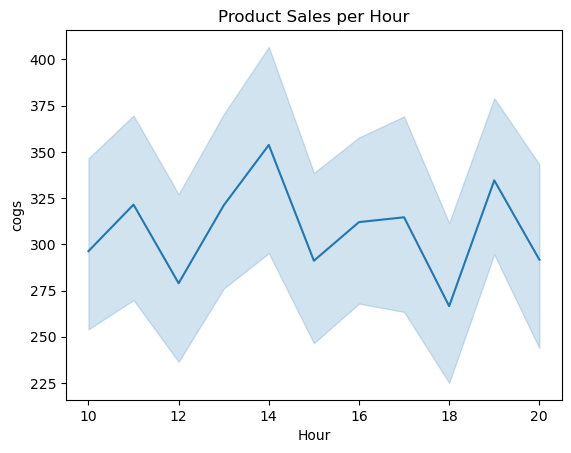

In [119]:
sns.lineplot(x="Hour",  y = 'cogs',data =df).set_title("Product Sales per Hour")

<Axes: xlabel='Quantity', ylabel='Product line'>

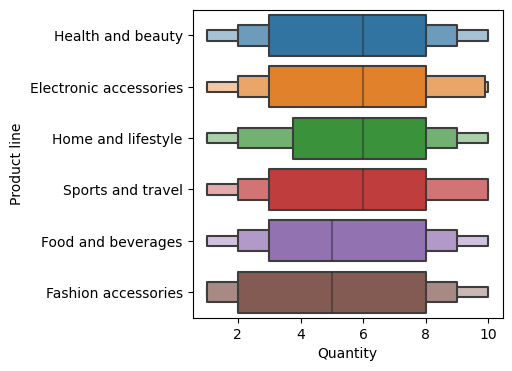

In [120]:
plt.figure(figsize=(4,4))
sns.boxenplot(data = df, x='Quantity', y='Product line')

<Axes: xlabel='Rating', ylabel='Product line'>

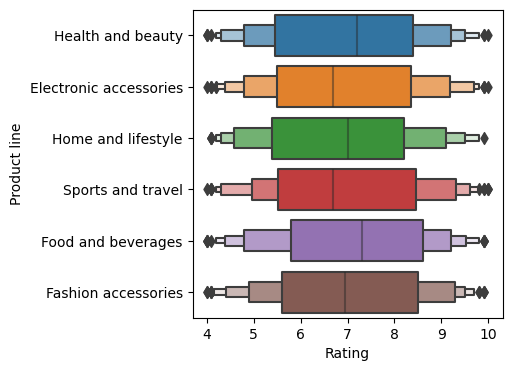

In [121]:
plt.figure(figsize=(4,4))
sns.boxenplot(data = df, x='Rating', y='Product line')

In [122]:
pd.crosstab(df['Branch'], df['Product line'])

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
A                                 60                   51                  58   
B                                 55                   62                  50   
C                                 55                   65                  66   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
A                            47                  65                 59  
B                            53                  50                 62  
C                            52                  45                 45

<Axes: xlabel='Product line', ylabel='Branch'>

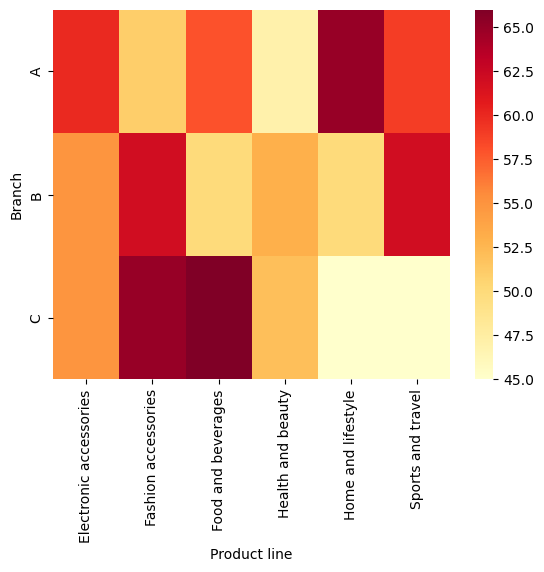

In [123]:
sns.heatmap(pd.crosstab(df['Branch'], df['Product line']), cmap='YlOrRd',linecolor='black')

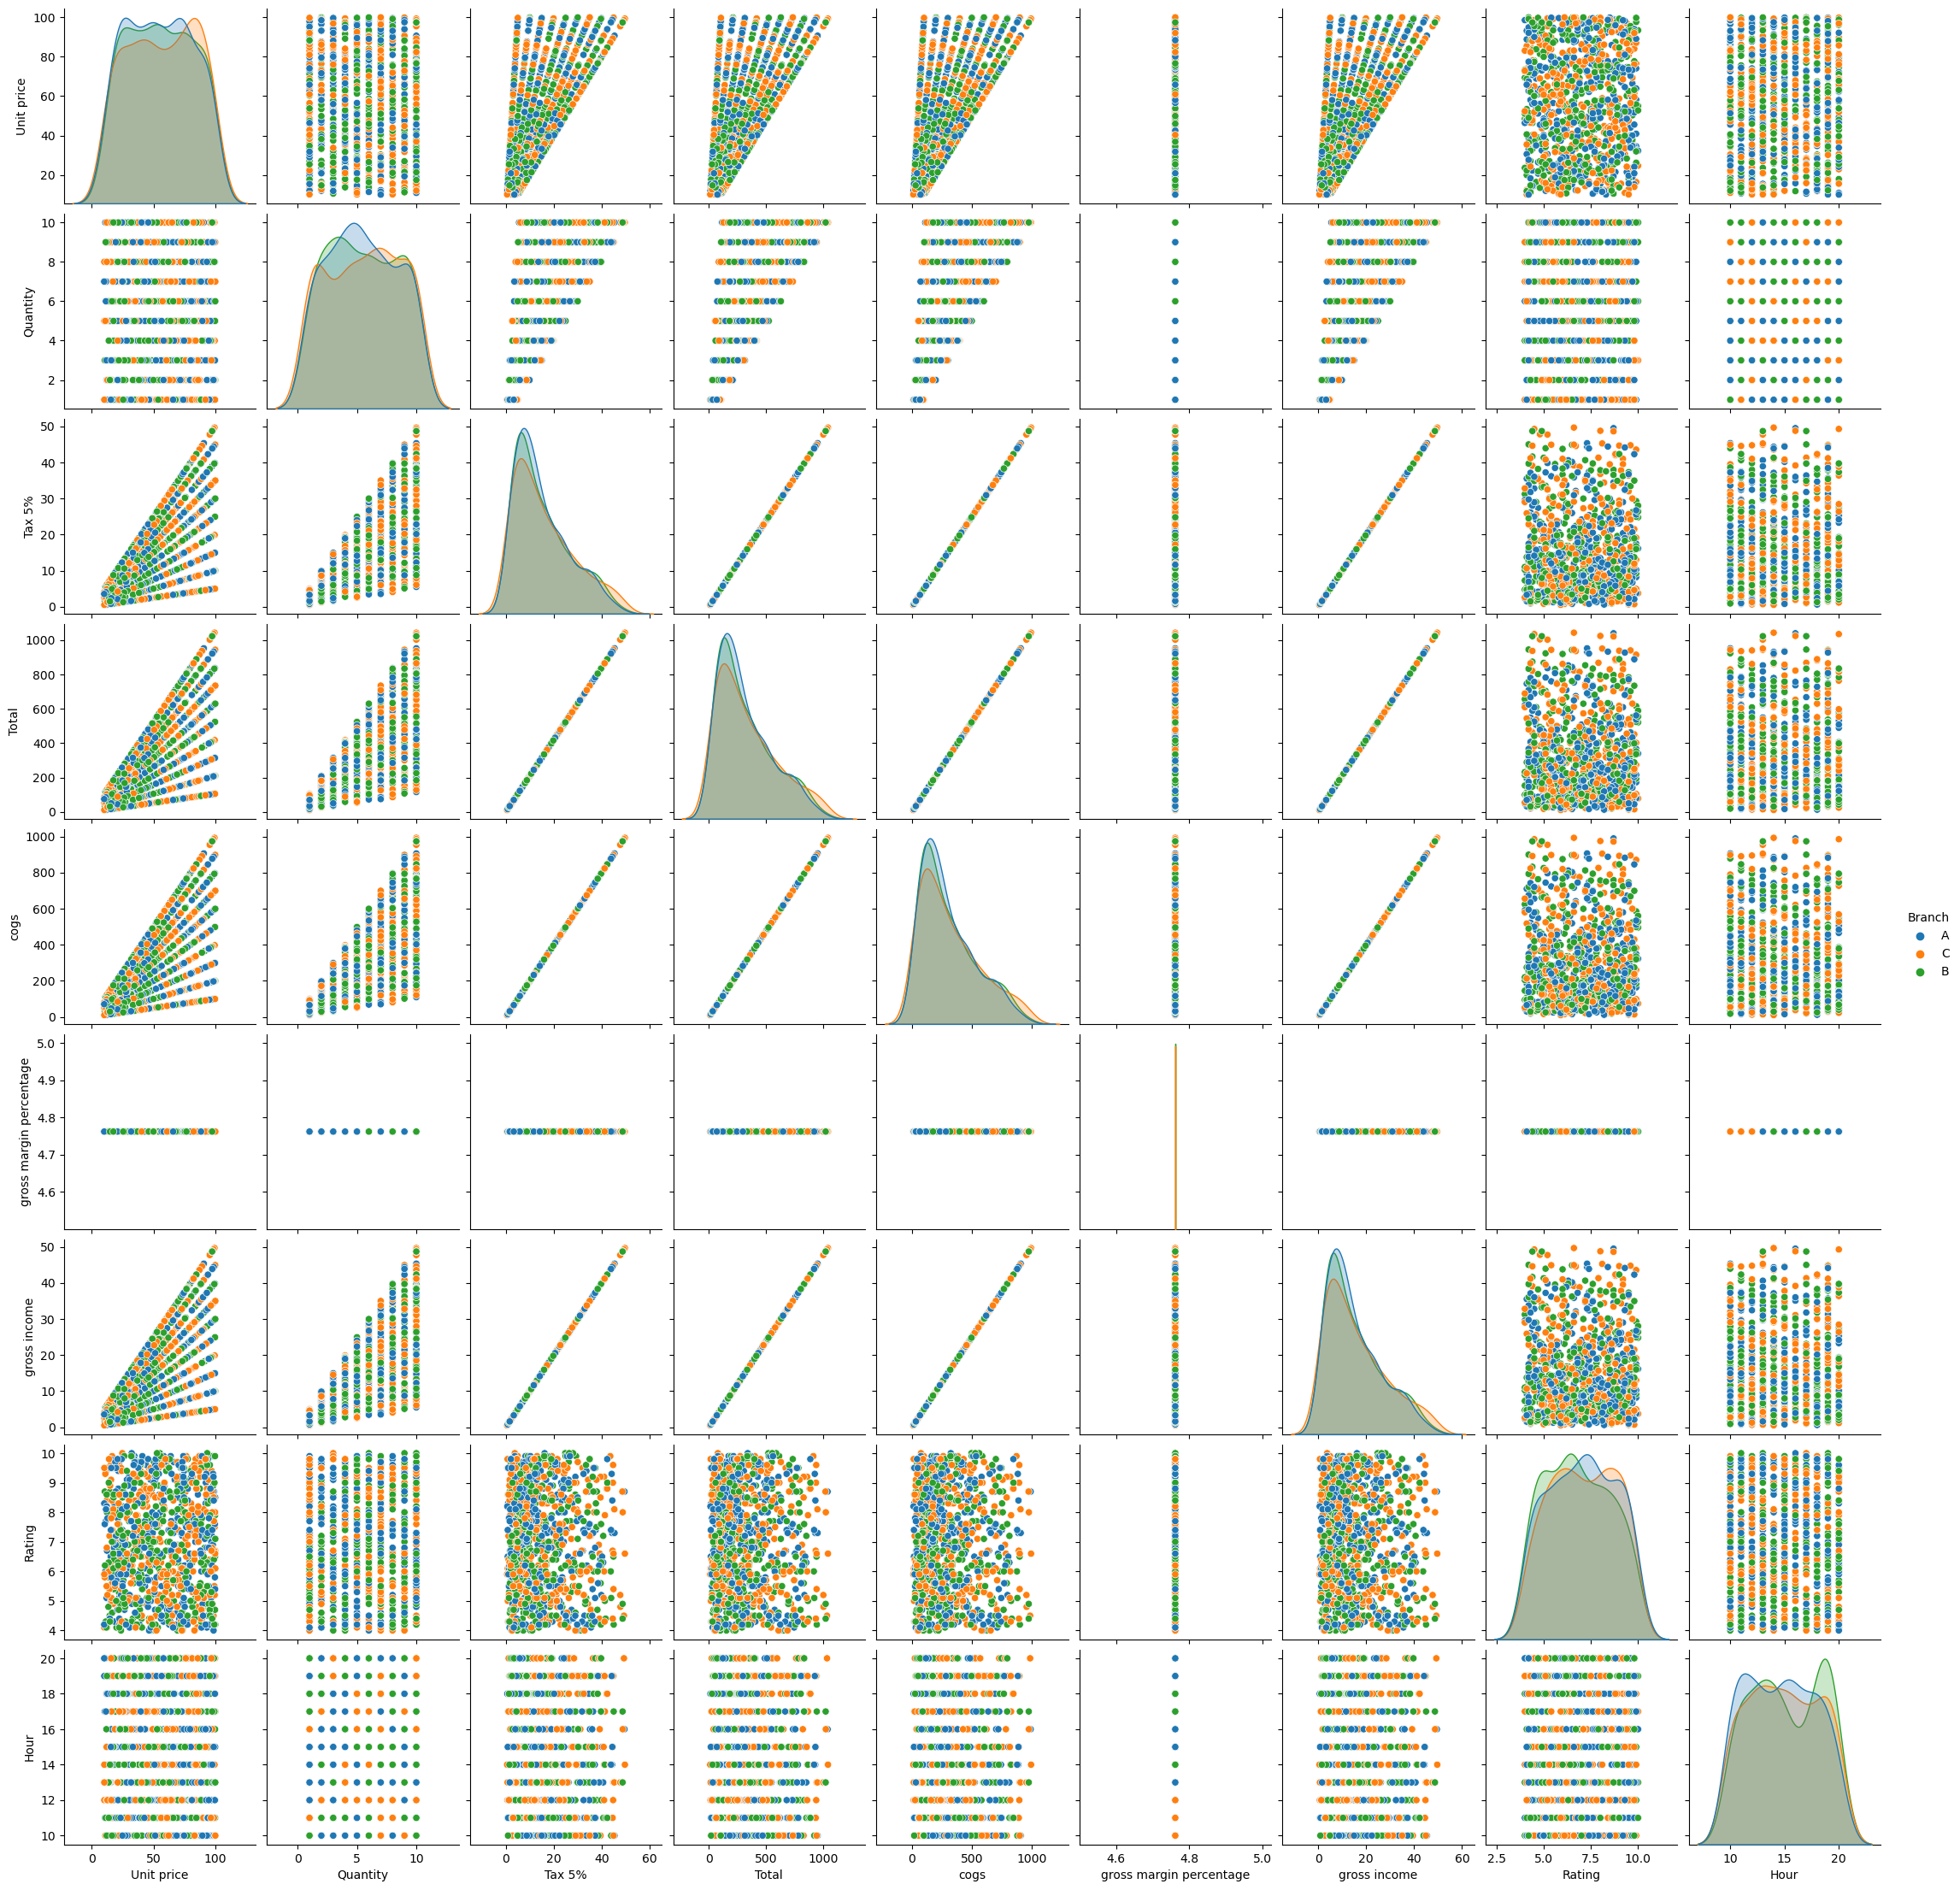

In [124]:
sns.pairplot(data = df, hue='Branch')

In [125]:
pd.crosstab(df['Branch'], df['Product line'], values=df['cogs'], aggfunc=np.sum)

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
A                           17444.87             15554.77            16345.81   
B                           16239.47             15631.73            14490.37   
C                           18065.69             20533.40            22635.10   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
A                      11997.86            21349.71           18450.19  
B                      19029.20            16713.49           19036.38  
C                      15824.12            13233.86           15011.36

# Most sold product line in every branch

<Axes: xlabel='Product line', ylabel='Branch'>

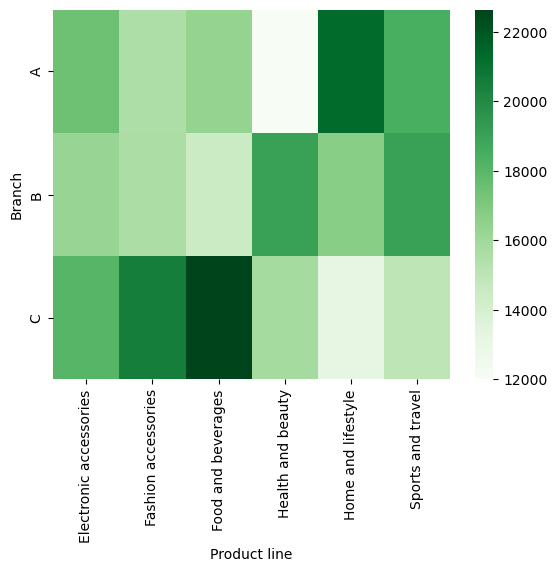

In [126]:
sns.heatmap(pd.crosstab(df['Branch'], df['Product line'], values=df['cogs'], aggfunc=np.sum), cmap='Greens')

[Text(0, 0, '345'), Text(0, 0, '344'), Text(0, 0, '311')]

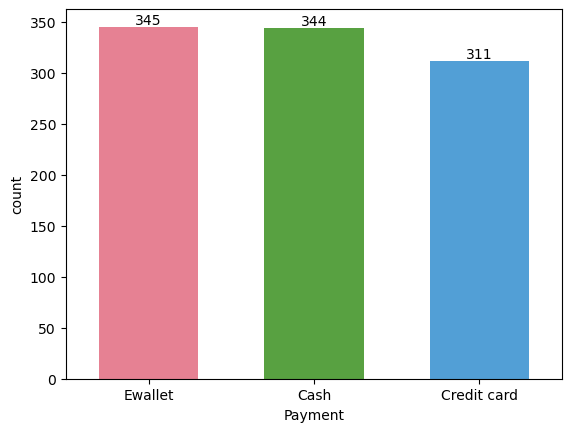

In [127]:
ax2 = sns.countplot(data = df, x='Payment', palette = "husl", width=0.6)
ax2.bar_label(ax2.containers[0])

In [128]:
z2 = df[['Branch', 'Customer type', 'cogs']].groupby(by=['Branch', 'Customer type']).sum().reset_index()
z2.set_index('Branch', inplace=True)

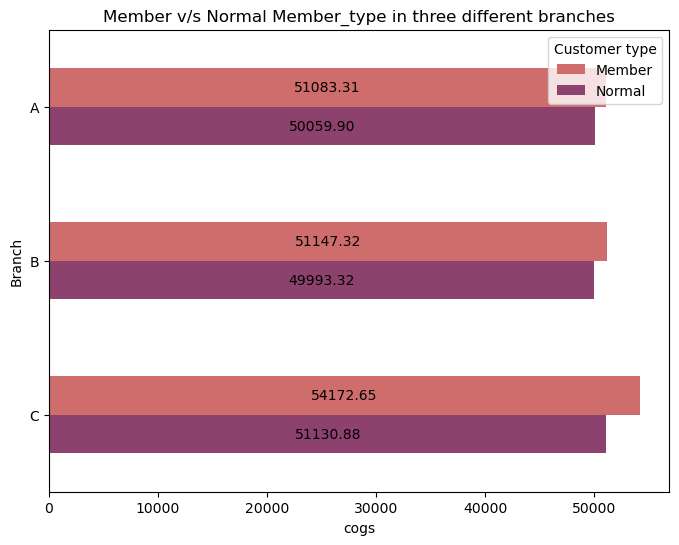

In [129]:
plt.figure(figsize=(8,6))
plt.title('Member v/s Normal Member_type in three different branches')
ax3 = sns.barplot(data=z2, y=z2.index, x=z2['cogs'], hue='Customer type', palette = "flare", width=0.5, orient='h')
for bar in ax3.containers:
    ax3.bar_label(bar, label_type='center', fmt='%.2f', fontsize=10)

<Axes: xlabel='Total', ylabel='Count'>

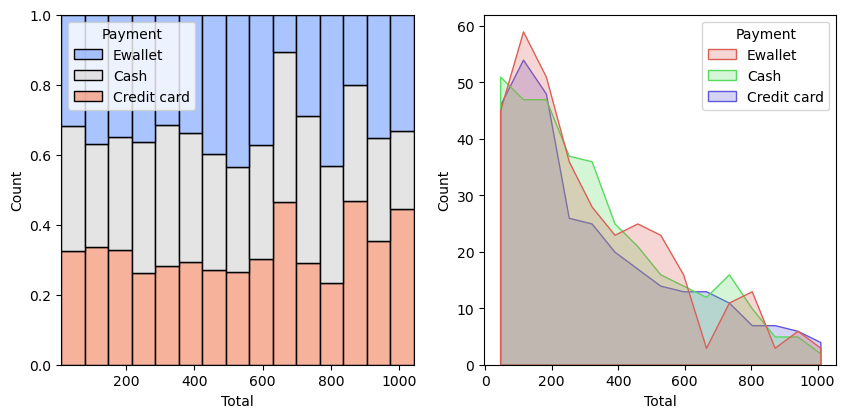

In [130]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.histplot(data = df, x='Total', hue='Payment', multiple='fill', element='bars',palette = "coolwarm" )
plt.subplot(222)
sns.histplot(data = df, x='Total', hue='Payment', element='poly', palette='hls' )

# Different Algos for prediction

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [132]:
df.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

                 Time      Payment    cogs  gross margin percentage  \
0 2024-05-02 13:08:00      Ewallet  522.83                 4.761905   
1 2024-05-02 10:29:00         Cash   76.40                 4.761905   
2 2024-05-02 13:23:00  Credit card  324.31                 4.761905   
3 2024-05-02 20:33:00      Ewallet  465.76                 4.761905   
4 2024-05-02 10:37:00      Ewallet  604.17                 4.761905   

   gross income  Rating  Hour  
0       26.1415     9.1    13  
1        3.8200     9.6    10  
2       16.2155     7.4    13  
3       23.2880     8.4    20  
4       30.2085     5.3    10

In [133]:
# For Outliers

In [134]:
Q1 = df["gross income"].quantile(0.25)
Q3 = df["gross income"].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = df['gross income'][(df["gross income"] >= lower_bound) & (df["gross income"]<= upper_bound)]
df['Filtered_gross income']=filtered_data

In [135]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

                 Time      Payment    cogs  gross margin percentage  \
0 2024-05-02 13:08:00      Ewallet  522.83                 4.761905   
1 2024-05-02 10:29:00         Cash   76.40                 4.761905   
2 2024-05-02 13:23:00  Credit card  324.31                 4.761905   
3 2024-05-02 20:33:00      Ewallet  465.76                 4.761905   
4 2024-05-02 10:37:00      Ewallet  604.17                 4.761905   

   gross income  Rating  Hour  Filtered_gross income  
0       26.1415     9.1    13                26.1415  
1        3.8200     9.6    10                 3.8200  
2       16.2155     7.4    13                16.2155  
3       23.2880     8.4    20                23.2880  
4       30.2085     5.3    10                30.2085

In [136]:
df["gross income"].mean()
df["Filtered_gross income"].fillna(15.379368999999999, inplace=True)

In [137]:
X=df.drop(['Filtered_gross income','Time','Invoice ID', 'gross income'],axis=1)
y=df["Filtered_gross income"]
y.index = X['Date']
X.drop('Date',axis = 1,inplace = True)
y

Date
1/5/2019     26.141500
3/8/2019      3.820000
3/3/2019     16.215500
1/27/2019    23.288000
2/8/2019     30.208500
               ...    
1/29/2019     2.017500
3/2/2019     15.379369
2/9/2019      1.592000
2/22/2019     3.291000
2/18/2019    30.919000
Name: Filtered_gross income, Length: 1000, dtype: float64

In [138]:
X

Branch       City Customer type  Gender            Product line  \
0        A     Yangon        Member  Female       Health and beauty   
1        C  Naypyitaw        Normal  Female  Electronic accessories   
2        A     Yangon        Normal    Male      Home and lifestyle   
3        A     Yangon        Member    Male       Health and beauty   
4        A     Yangon        Normal    Male       Sports and travel   
..     ...        ...           ...     ...                     ...   
995      C  Naypyitaw        Normal    Male       Health and beauty   
996      B   Mandalay        Normal  Female      Home and lifestyle   
997      A     Yangon        Member    Male      Food and beverages   
998      A     Yangon        Normal    Male      Home and lifestyle   
999      A     Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%      Total      Payment    cogs  \
0         74.69         7  26.1415   548.9715      Ewallet  522.83   
1         15.28         5   3.8200    80.2200         Cash   76.40   
2         46.33         7  16.2155   340.5255  Credit card  324.31   
3         58.22         8  23.2880   489.0480      Ewallet  465.76   
4         86.31         7  30.2085   634.3785      Ewallet  604.17   
..          ...       ...      ...        ...          ...     ...   
995       40.35         1   2.0175    42.3675      Ewallet   40.35   
996       97.38        10  48.6900  1022.4900      Ewallet  973.80   
997       31.84         1   1.5920    33.4320         Cash   31.84   
998       65.82         1   3.2910    69.1110         Cash   65.82   
999       88.34         7  30.9190   649.2990         Cash  618.38   

     gross margin percentage  Rating  Hour  
0                   4.761905     9.1    13  
1                   4.761905     9.6    10  
2                   4.761905     7.4    13  
3                   4.761905     8.4    20  
4                   4.761905     5.3    10  
..                       ...     ...   ...  
995                 4.761905     6.2    13  
996                 4.761905     4.4    17  
997                 4.761905     7.7    13  
998                 4.761905     4.1    15  
999                 4.761905     6.6    13  

[1000 rows x 14 columns]

In [139]:
#data = df.drop(['Invoice ID','Date','Time','cogs','gross margin percentage','Hour','City'], axis=1)

In [140]:
#data.head()

In [141]:
#X=data.drop('Total', axis=1)
#y=data['Total']

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

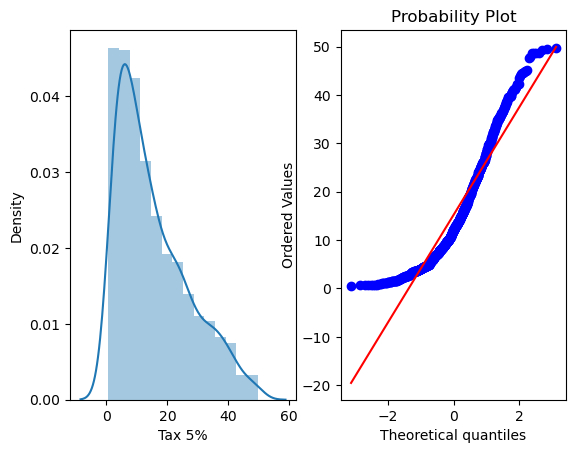

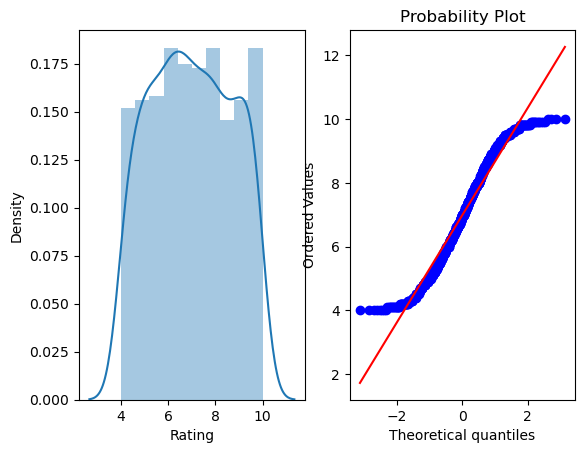

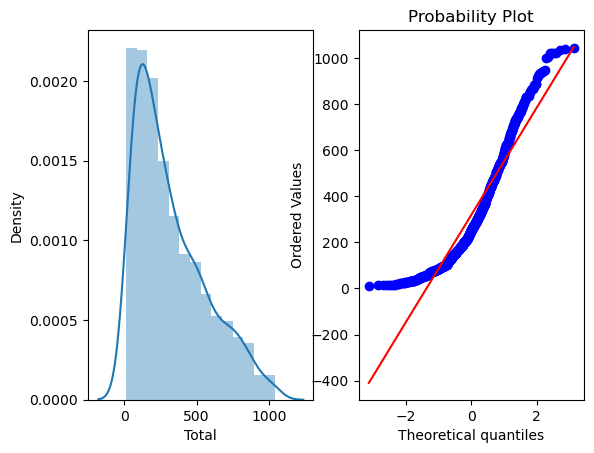

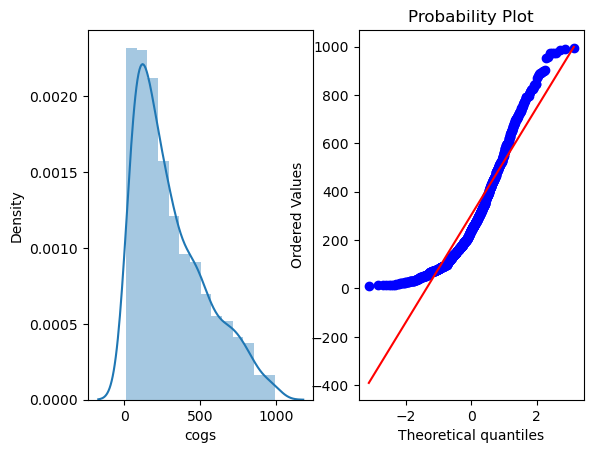

In [143]:
from scipy import stats
fig, ax = plt.subplots(1,2)
sns.distplot(x_train['Tax 5%'], ax=ax[0])
stats.probplot(x_train['Tax 5%'], plot=ax[1])

fig, ax1 = plt.subplots(1,2)
sns.distplot(x_train['Rating'], ax=ax1[0])
stats.probplot(x_train['Rating'], plot=ax1[1])

fig, ax2 = plt.subplots(1,2)
sns.distplot(x_train['Total'], ax=ax2[0])
stats.probplot(x_train['Total'], plot=ax2[1])

fig, ax3 = plt.subplots(1,2)
sns.distplot(x_train['cogs'], ax=ax3[0])
stats.probplot(x_train['cogs'], plot=ax3[1])

plt.show()

In [144]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [145]:
x_train

Branch       City Customer type  Gender            Product line  \
29       A     Yangon        Normal    Male       Health and beauty   
535      C  Naypyitaw        Normal    Male      Home and lifestyle   
695      A     Yangon        Member  Female      Home and lifestyle   
557      C  Naypyitaw        Member  Female      Food and beverages   
836      A     Yangon        Member    Male     Fashion accessories   
..     ...        ...           ...     ...                     ...   
106      C  Naypyitaw        Normal    Male     Fashion accessories   
270      B   Mandalay        Normal  Female       Sports and travel   
860      C  Naypyitaw        Member  Female      Home and lifestyle   
435      C  Naypyitaw        Normal    Male       Sports and travel   
102      C  Naypyitaw        Normal  Female  Electronic accessories   

     Unit price  Quantity   Tax 5%      Total      Payment    cogs  \
29        24.89         9  11.2005   235.2105         Cash  224.01   
535       16.67         7   5.8345   122.5245      Ewallet  116.69   
695       87.37         5  21.8425   458.6925         Cash  436.85   
557       98.52        10  49.2600  1034.4600      Ewallet  985.20   
836       38.54         5   9.6350   202.3350      Ewallet  192.70   
..          ...       ...      ...        ...          ...     ...   
106       27.38         6   8.2140   172.4940  Credit card  164.28   
270       67.43         5  16.8575   354.0075      Ewallet  337.15   
860       86.27         1   4.3135    90.5835      Ewallet   86.27   
435       99.24         9  44.6580   937.8180      Ewallet  893.16   
102       23.07         9  10.3815   218.0115         Cash  207.63   

     gross margin percentage  Rating  Hour  
29                  4.761905     7.4    15  
535                 4.761905     7.4    11  
695                 4.761905     6.6    19  
557                 4.761905     4.5    20  
836                 4.761905     5.6    13  
..                       ...     ...   ...  
106                 4.761905     7.9    20  
270                 4.761905     6.3    18  
860                 4.761905     7.0    13  
435                 4.761905     9.0    19  
102                 4.761905     4.9    11  

[800 rows x 14 columns]

In [146]:
#ohe the categorical features
trf1 = ColumnTransformer(transformers = [
    ('ohe', OneHotEncoder(), [0,1,2,3,4,9])
], remainder='passthrough')

#Log transformation 
trf2 = ColumnTransformer(transformers=[
    ('log', FunctionTransformer(func=np.log1p), [7,8,10])
], remainder='passthrough')

trf3 = ColumnTransformer(transformers=[
    ('SS', StandardScaler(), [5,6,11,12]),
    #('minmax', MinMaxScaler(), [4,5,8])
], remainder='passthrough')

In [147]:
trf4 = SVR(kernel='poly')
trf5 = RandomForestRegressor()

In [148]:
pipe1 = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4)
])

In [149]:
pipe1.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 9])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [7, 8, 10])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SS', StandardScaler(),
                                                  [5, 6, 11, 12])])),
                ('trf4', SVR(kernel='poly'))])

In [150]:
y_pred1 = pipe1.predict(x_test)

In [151]:
np.mean(cross_val_score(pipe1, X,y, cv=5,scoring='r2'))

0.6358262468444371

In [152]:
print('r2_score is:',r2_score(y_test, y_pred1))
print('MSE is:',mean_squared_error(y_test, y_pred1))
print('MAE is:',mean_absolute_error(y_test, y_pred1))
print('RMSE is:',np.sqrt(mean_squared_error(y_test, y_pred1)))

r2_score is: 0.8464857855656999
MSE is: 22.647352040959703
MAE is: 3.907338458511246
RMSE is: 4.758923411966167


In [153]:
pipe2 = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf5', trf5)
])

In [154]:
pipe2.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 9])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [7, 8, 10])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SS', StandardScaler(),
                                                  [5, 6, 11, 12])])),
                ('trf5', RandomForestRegressor())])

In [155]:
y_pred2 = pipe2.predict(x_test)

In [156]:
print('r2_score is:',r2_score(y_test, y_pred2))
print('MSE is:',mean_squared_error(y_test, y_pred2))
print('MAE is:',mean_absolute_error(y_test, y_pred2))
print('RMSE is:',np.sqrt(mean_squared_error(y_test, y_pred2)))

r2_score is: 0.9999722492399861
MSE is: 0.004093961160250108
MAE is: 0.0368707500000002
RMSE is: 0.06398406958181159


In [157]:
from sklearn.model_selection import GridSearchCV
params = {
    'trf5__n_estimators':[15,25,50,60],
    'trf5__max_features':[0.2,0.3],
    'trf5__max_samples':[0.55,0.75],
    'trf5__criterion':['squared_error','absolute_error']
}
pipe2_grid = GridSearchCV(estimator=pipe2, param_grid=params, cv=5, n_jobs=-1)
pipe2_grid.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4,
                                                                          9])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         [7, 8,
                                                                          10])])),
                                       ('trf3',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('SS',
                                                                         StandardScaler(),
                                                                         [5, 6,
                                                                          11,
                                                                          12])])),
                                       ('trf5', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'trf5__criterion': ['squared_error', 'absolute_error'],
                         'trf5__max_features': [0.2, 0.3],
                         'trf5__max_samples': [0.55, 0.75],
                         'trf5__n_estimators': [15, 25, 50, 60]})

In [158]:
pipe2_grid.best_score_

0.9960140259122886

In [159]:
pipe2_grid.best_params_

{'trf5__criterion': 'squared_error',
 'trf5__max_features': 0.3,
 'trf5__max_samples': 0.75,
 'trf5__n_estimators': 25}

In [160]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
trf6 = AdaBoostRegressor()
trf7 = GradientBoostingRegressor()

In [161]:
pipe3 = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf6', trf6)
])

In [162]:
pipe3.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 9])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [7, 8, 10])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SS', StandardScaler(),
                                                  [5, 6, 11, 12])])),
                ('trf6', AdaBoostRegressor())])

In [163]:
y_pred3 = pipe3.predict(x_test)

In [164]:
print('r2_score is:',r2_score(y_test, y_pred3))
print('MSE is:',mean_squared_error(y_test, y_pred3))
print('MAE is:',mean_absolute_error(y_test, y_pred3))
print('RMSE is:',np.sqrt(mean_squared_error(y_test, y_pred3)))

r2_score is: 0.9964023335134714
MSE is: 0.5307496751790778
MAE is: 0.5796188321114354
RMSE is: 0.7285256860118783


In [165]:
params1 = {
    'trf6__n_estimators':[10,50,60,80],
    'trf6__learning_rate':[0.0001,0.001,0.01,0.1,1.0],
    'trf6__loss':['linear', 'square', 'exponential']
}
pipe3_grid = GridSearchCV(estimator=pipe3, param_grid=params1, cv=5, n_jobs=-1)
pipe3_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4,
                                                                          9])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         [7, 8,
                                                                          10])])),
                                       ('trf3',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('SS',
                                                                         StandardScaler(),
                                                                         [5, 6,
                                                                          11,
                                                                          12])])),
                                       ('trf6', AdaBoostRegressor())]),
             n_jobs=-1,
             param_grid={'trf6__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'trf6__loss': ['linear', 'square', 'exponential'],
                         'trf6__n_estimators': [10, 50, 60, 80]})

In [166]:
pipe3_grid.best_score_

0.9973981631342601

In [167]:
pipe3_grid.best_params_

{'trf6__learning_rate': 1.0, 'trf6__loss': 'square', 'trf6__n_estimators': 80}

In [168]:
pipe4 = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf7', trf7)
])

In [169]:
pipe4.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 9])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [7, 8, 10])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SS', StandardScaler(),
                                                  [5, 6, 11, 12])])),
                ('trf7', GradientBoostingRegressor())])

In [170]:
y_pred4 = pipe4.predict(x_test)

In [171]:
print('r2_score is:',r2_score(y_test, y_pred4))
print('MSE is:',mean_squared_error(y_test, y_pred4))
print('MAE is:',mean_absolute_error(y_test, y_pred4))
print('RMSE is:',np.sqrt(mean_squared_error(y_test, y_pred4)))

r2_score is: 0.9999172042678112
MSE is: 0.012214530760426036
MAE is: 0.07582079871399333
RMSE is: 0.1105193682592605


In [172]:
params1 = {
    'trf7__n_estimators':[80,100,150,180],
    'trf7__learning_rate':[0.0001,0.001,0.01,0.1,1.0],
    'trf7__loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
    'trf7__max_features': ['sqrt', 'log2'],
    'trf7__criterion': ['friedman_mse', 'squared_error']
}
pipe4_grid = GridSearchCV(estimator=pipe4, param_grid=params1, cv=5, n_jobs=-1)
pipe4_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4,
                                                                          9])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         [7, 8,
                                                                          10])])),
                                       ('trf3',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('SS',
                                                                         StandardScaler(),
                                                                         [5, 6,
                                                                          11,
                                                                          12])])),
                                       ('trf7', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'trf7__criterion': ['friedman_mse', 'squared_error'],
                         'trf7__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'trf7__loss': ['squared_error', 'absolute_error',
                                        'huber', 'quantile'],
                         'trf7__max_features': ['sqrt', 'log2'],
                         'trf7__n_estimators': [80, 100, 150, 180]})

In [173]:
pipe4_grid.best_score_

0.9959508113654628

In [174]:
pipe4_grid.best_params_

{'trf7__criterion': 'squared_error',
 'trf7__learning_rate': 0.1,
 'trf7__loss': 'huber',
 'trf7__max_features': 'sqrt',
 'trf7__n_estimators': 150}

In [175]:
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

lr1=LinearRegression()
svr= SVR()
dtr =DecisionTreeRegressor()

estimators = [('lr1',lr1),('svr',svr),('dtr',dtr)]

trf8 = VotingRegressor(estimators=estimators)
pipe5 = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf8', trf8)
])
pipe5.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 9])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [7, 8, 10])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SS', StandardScaler(),
                                                  [5, 6, 11, 12])])),
                ('trf8',
                 VotingRegressor(estimators=[('lr1', LinearRegression()),
                                             ('svr', SVR()),
                                             ('dtr',
                                              DecisionTreeRegressor())]))])

In [176]:
y_pred5 = pipe5.predict(x_test)

In [177]:
print('r2_score is:',r2_score(y_test, y_pred5))
print('MSE is:',mean_squared_error(y_test, y_pred5))
print('MAE is:',mean_absolute_error(y_test, y_pred5))
print('RMSE is:',np.sqrt(mean_squared_error(y_test, y_pred5)))

r2_score is: 0.993850743646424
MSE is: 0.9071757553053453
MAE is: 0.5664921162305779
RMSE is: 0.9524577446298315


In [178]:
from sklearn.model_selection import cross_val_score

y_pred5 = pipe5.predict(x_test)
np.mean(cross_val_score(pipe5, X,y, cv=10, scoring='r2'))

0.973818096465058

In [179]:
from sklearn.linear_model import Ridge, Lasso
trf9 = Ridge(alpha=0.0001)
trf10= Lasso(alpha=0.0001)

pipe6 = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf9', trf9)
])
pipe6.fit(x_train, y_train)
y_pred6 = pipe6.predict(x_test)

pipe7 = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf10', trf10)
])
pipe7.fit(x_train, y_train)
y_pred7 = pipe7.predict(x_test)

In [180]:
print('r2_score_Ridge is:',np.mean(cross_val_score(pipe6, X,y, cv=15, scoring='r2')))
print('MSE_Ridge is:',mean_squared_error(y_test, y_pred6))
print('MAE_Ridge is:',mean_absolute_error(y_test, y_pred6))
print('RMSE_Ridge is:',np.sqrt(mean_squared_error(y_test, y_pred6)))

print('r2_score_Lasso is:',np.mean(cross_val_score(pipe7, X,y, cv=15, scoring='r2')))
print('MSE_Lasso  is:',mean_squared_error(y_test, y_pred7))
print('MAE_Lasso  is:',mean_absolute_error(y_test, y_pred7))
print('RMSE_Lasso  is:',np.sqrt(mean_squared_error(y_test, y_pred7)))

r2_score_Ridge is: 0.9188721979782014
MSE_Ridge is: 2.056792857766263
MAE_Ridge is: 1.0653696563875599
RMSE_Ridge is: 1.434152313307852
r2_score_Lasso is: 0.9188727137892342
MSE_Lasso  is: 2.0564412704236945
MAE_Lasso  is: 1.0651610879686004
RMSE_Lasso  is: 1.4340297313597423


In [181]:
trf11 = KNeighborsRegressor(n_neighbors=5)
pipe8 = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf11', trf11)
])
pipe8.fit(x_train, y_train)
y_pred8 = pipe8.predict(x_test)
print('r2_score_knn is:',np.mean(cross_val_score(pipe8, X,y, cv=5, scoring='r2')))
print('MSE_knn is:',mean_squared_error(y_test, y_pred7))
print('MAE_knn is:',mean_absolute_error(y_test, y_pred7))
print('RMSE_knn is:',np.sqrt(mean_squared_error(y_test, y_pred7)))

r2_score_knn is: 0.9998976754208228
MSE_knn is: 2.0564412704236945
MAE_knn is: 1.0651610879686004
RMSE_knn is: 1.4340297313597423


# Residual / Error graphs to know how much mistakes the algorithms are doing :-

In [182]:
svm_res = y_test - y_pred1
rf_res = y_test - y_pred2
ada_res = y_test - y_pred3
gb_res= y_test - y_pred4
vot_res= y_test - y_pred5
rr_res= y_test - y_pred6
knn_res= y_test - y_pred8

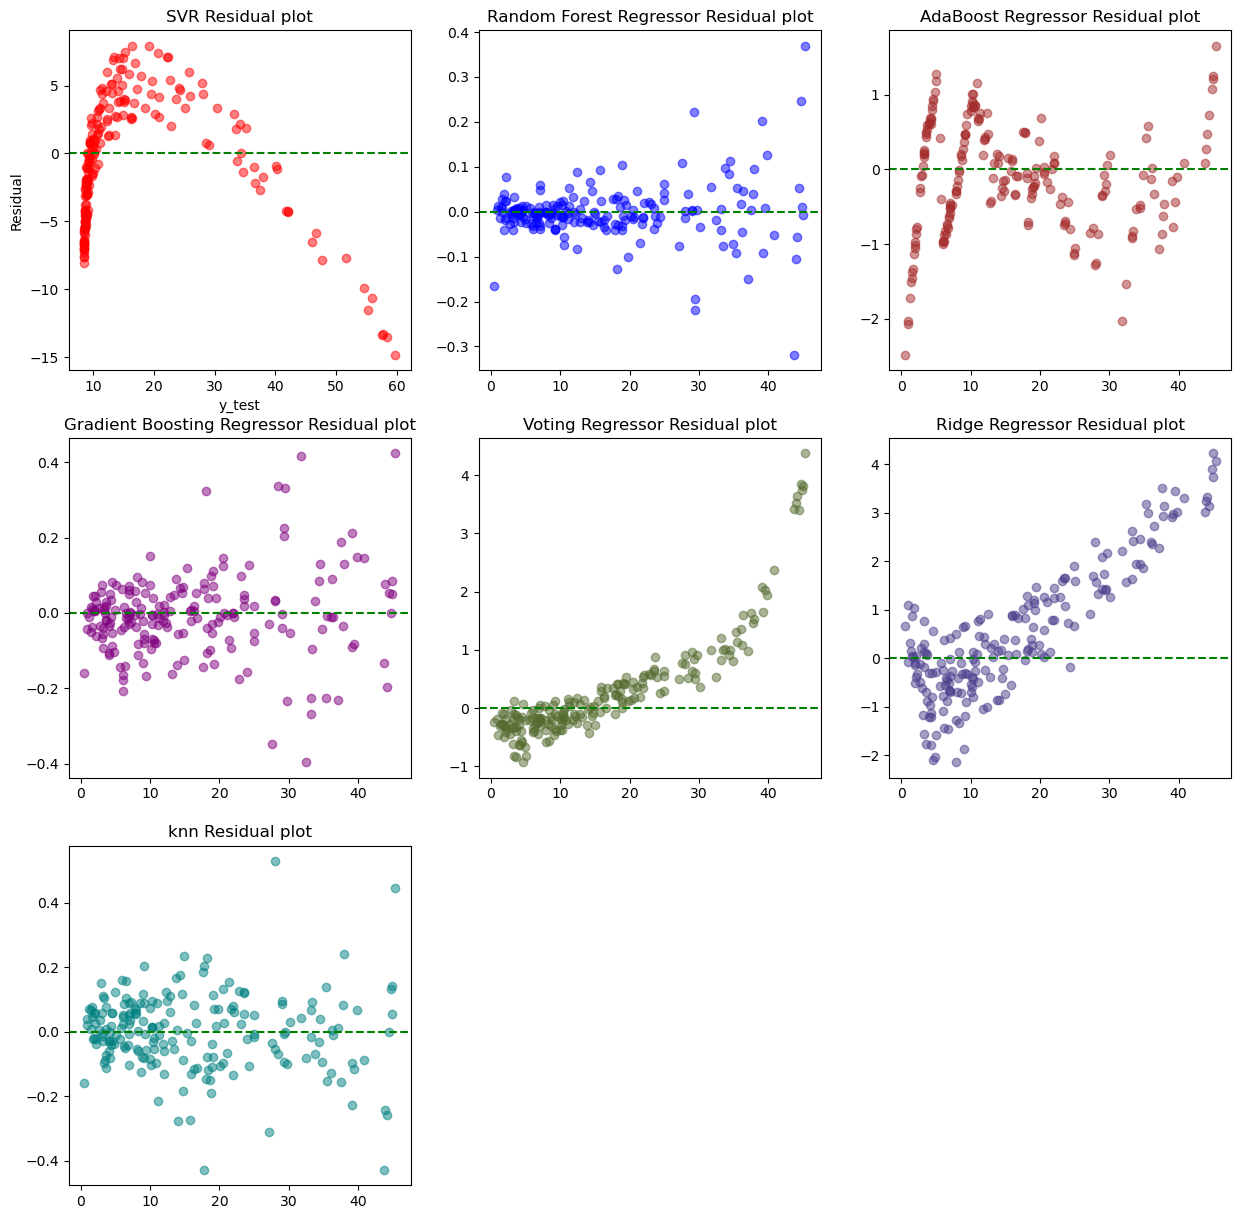

In [183]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
plt.title('SVR Residual plot')
plt.scatter(y_pred1, svm_res, alpha=0.5, color='red')
plt.axhline(y=0, color='green', linestyle='--', label='y=2')
plt.xlabel('y_test')
plt.ylabel('Residual')
plt.subplot(3,3,2)
plt.title('Random Forest Regressor Residual plot')
plt.scatter(y_test, rf_res, alpha=0.5, color='blue')
plt.axhline(y=0, color='green', linestyle='--', label='y=2')
plt.subplot(3,3,3)
plt.title('AdaBoost Regressor Residual plot')
plt.scatter(y_test, ada_res, alpha=0.5, color='brown')
plt.axhline(y=0, color='green', linestyle='--', label='y=2')
plt.subplot(3,3,4)
plt.title('Gradient Boosting Regressor Residual plot')
plt.scatter(y_test, gb_res, alpha=0.5, color='purple')
plt.axhline(y=0, color='green', linestyle='--', label='y=2')
plt.subplot(3,3,5)
plt.title('Voting Regressor Residual plot')
plt.scatter(y_test, vot_res, alpha=0.5, color='darkolivegreen')
plt.axhline(y=0, color='green', linestyle='--', label='y=2')
plt.subplot(3,3,6)
plt.title('Ridge Regressor Residual plot')
plt.scatter(y_test, rr_res, alpha=0.5, color='darkslateblue')
plt.axhline(y=0, color='green', linestyle='--')

plt.subplot(3,3,7)
plt.title('knn Residual plot')
plt.scatter(y_test, knn_res, alpha=0.5, color='teal')
plt.axhline(y=0, color='green', linestyle='--', label='y=2')

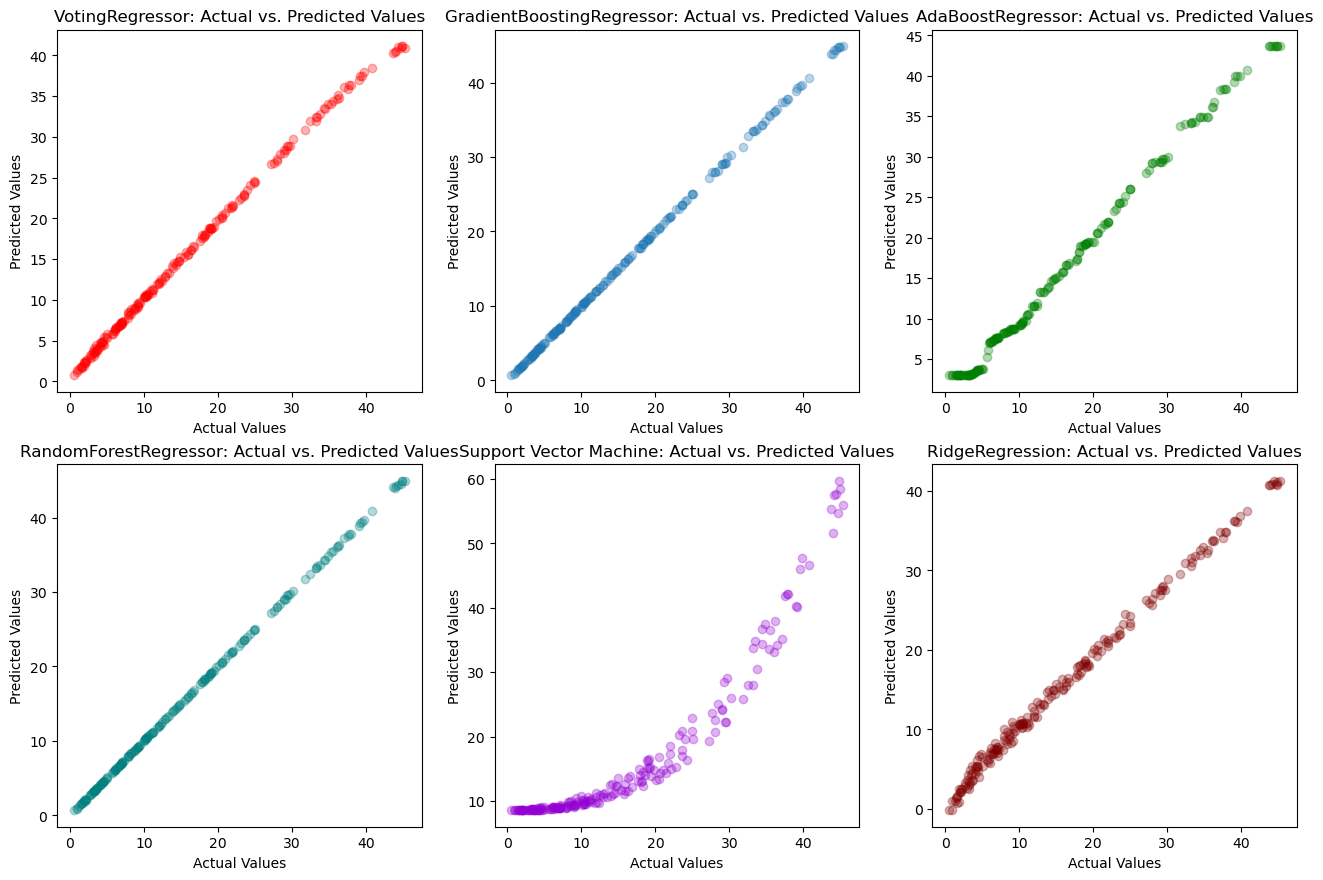

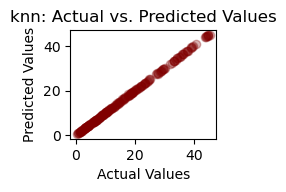

In [184]:
plt.figure(figsize=(16,16))
plt.subplot(3,3,1)
plt.scatter(y_test, y_pred5, alpha=0.3, c='r')
plt.title('VotingRegressor: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(3,3,2)
plt.scatter(y_test, y_pred4, alpha=0.3)
plt.title('GradientBoostingRegressor: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(3,3,3)
plt.scatter(y_test, y_pred3, alpha=0.3, c='g')
plt.title('AdaBoostRegressor: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(3,3,4)
plt.scatter(y_test, y_pred2, alpha=0.3,c='teal')
plt.title('RandomForestRegressor: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(3,3,5)
plt.scatter(y_test, y_pred1, alpha=0.3, c='darkviolet')
plt.title('Support Vector Machine: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(3,3,6)
plt.scatter(y_test, y_pred6, alpha=0.3, c='maroon')
plt.title('RidgeRegression: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

plt.subplot(3,3,6)
plt.scatter(y_test, y_pred8, alpha=0.3, c='maroon')
plt.title('knn: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [187]:
import xgboost as xgb

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1, 
    'max_depth': 6, 
    'subsample': 0.8,  
    'colsample_bytree': 0.8
}

pipe9 =Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('xgb', xgb.XGBRegressor(**params))
])
pipe9.fit(x_train, y_train)
y_pred_xgb = pipe9.predict(x_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(r2_score(y_test, y_pred_xgb))
print(rmse_xgb)
print(mae_xgb)

0.999951114103346
0.08492317270033854
0.057343656625747606


Text(0, 0.5, 'Residual')

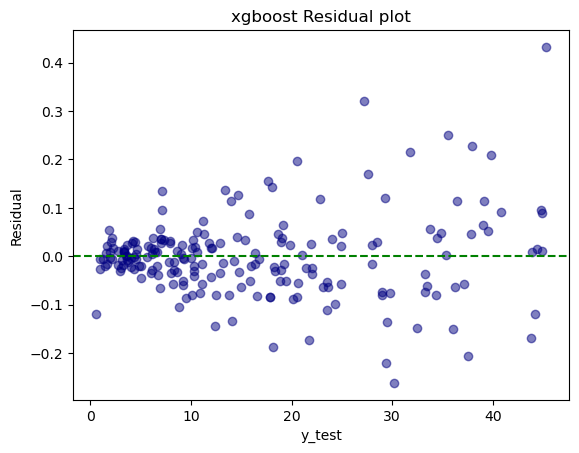

In [188]:
xgb_res = y_test - y_pred_xgb
plt.title('xgboost Residual plot')
plt.scatter(y_test, xgb_res, alpha=0.5, color='navy')
plt.axhline(y=0, color='green', linestyle='--', label='y=2')
plt.xlabel('y_test')
plt.ylabel('Residual')

In [190]:
r2_svc= np.mean(cross_val_score(pipe1, X,y, cv=5,scoring='r2'))
mae_svc = cross_val_score(pipe1, X,y, cv=5,scoring='neg_mean_absolute_error')
mae_svc = -mae_svc
mae_svc = np.mean(mae_svc)

r2_rf= np.mean(cross_val_score(pipe2, X,y, cv=5,scoring='r2'))
mae_rf = cross_val_score(pipe2, X,y, cv=5,scoring='neg_mean_absolute_error')
mae_rf = -mae_rf
mae_rf = np.mean(mae_rf)

r2_ada= np.mean(cross_val_score(pipe3, X,y, cv=5,scoring='r2'))
mae_ada = cross_val_score(pipe3, X,y, cv=5,scoring='neg_mean_absolute_error')
mae_ada = -mae_ada
mae_ada = np.mean(mae_ada)

r2_gbr= np.mean(cross_val_score(pipe4, X,y, cv=5,scoring='r2'))
mae_gbr = cross_val_score(pipe4, X,y, cv=5,scoring='neg_mean_absolute_error')
mae_gbr = -mae_gbr
mae_gbr = np.mean(mae_gbr)

r2_vot= np.mean(cross_val_score(pipe5, X,y, cv=5,scoring='r2'))
mae_vot = cross_val_score(pipe5, X,y, cv=5,scoring='neg_mean_absolute_error')
mae_vot = -mae_vot
mae_vot = np.mean(mae_vot)

r2_knn= np.mean(cross_val_score(pipe8, X,y, cv=5,scoring='r2'))
mae_knn = cross_val_score(pipe8, X,y, cv=5,scoring='neg_mean_absolute_error')
mae_knn = -mae_knn
mae_knn = np.mean(mae_knn)

r2_xgb= np.mean(cross_val_score(pipe9, X,y, cv=5,scoring='r2'))
mae_xgb = cross_val_score(pipe9, X,y, cv=5,scoring='neg_mean_absolute_error')
mae_xgb = -mae_xgb
mae_xgb = np.mean(mae_xgb)

r2_rr= np.mean(cross_val_score(pipe6, X,y, cv=5,scoring='r2'))
mae_rr = cross_val_score(pipe6, X,y, cv=5,scoring='neg_mean_absolute_error')
mae_rr = -mae_rr
mae_rr = np.mean(mae_rr)

model_names = ['Support Vector Regressor', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Voting','knn','XGBoost','Ridge Regression']
r2_values = [r2_svc, r2_rf, r2_ada, r2_gbr, r2_vot, r2_knn,r2_xgb, r2_rr]
mae_values = [mae_svc, mae_rf, mae_ada, mae_gbr, mae_vot, mae_knn,mae_xgb, mae_rr]

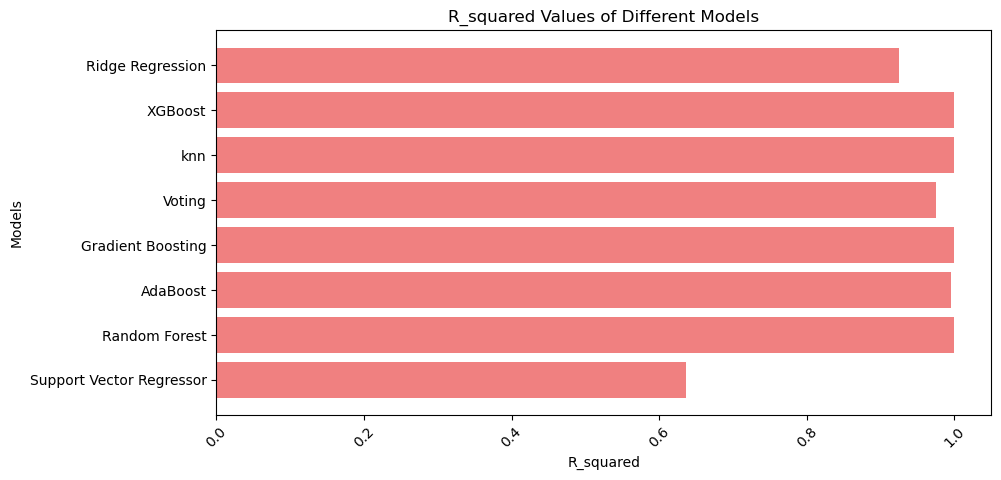

In [191]:
plt.figure(figsize=(10, 5))
plt.barh(model_names, r2_values, color='lightcoral')
plt.title('R_squared Values of Different Models')
plt.ylabel('Models')
plt.xlabel('R_squared')
plt.xticks(rotation=45)
plt.show()

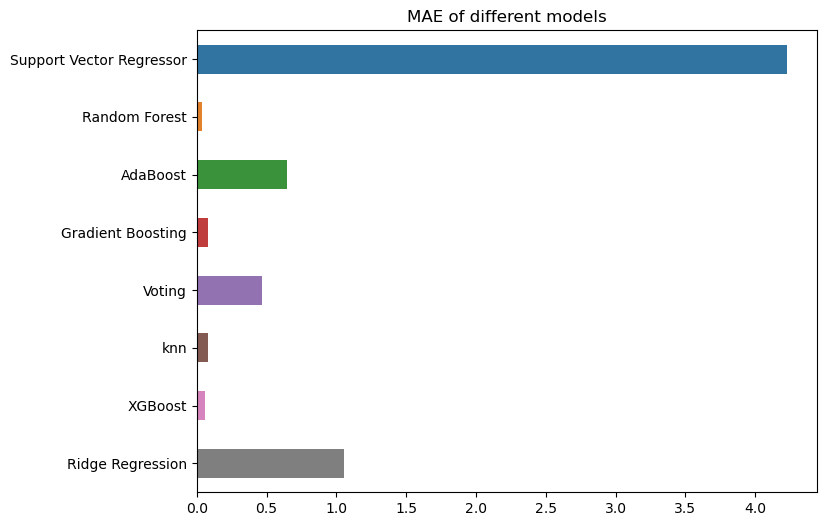

In [192]:
plt.figure(figsize=(8,6))
plt.title('MAE of different models')
ax3 = sns.barplot(y= model_names,x= mae_values, width=0.5, orient='h')